In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the data set
train = pd.read_csv('C:/Users/user/Desktop/Analytics Vidhya/loan_prediction_model/train.csv')
test = pd.read_csv('C:/Users/user/Desktop/Analytics Vidhya/loan_prediction_model/test.csv')


In [3]:
train_original = train.copy()#just making a copy so that we still have the original data set
test_original=test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.shape,test.shape

((614, 13), (367, 12))

In [9]:
#Univariate analysis - it is te simplest form of analyzing the data where we examine each variable individually
# target variable is the loan_status so let's take that first
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

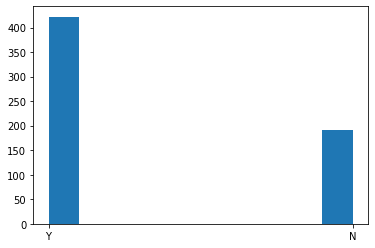

In [10]:
fig=plt.figure()
ax=fig.add_subplot()
ax.hist(train['Loan_Status']) #plot using the histograms
plt.show()


<AxesSubplot:>

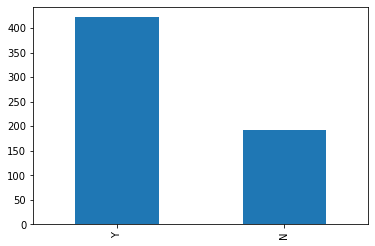

In [11]:
train['Loan_Status'].value_counts().plot.bar() #another way of plotting

let's visualize the categorical features and the below plot shows that there are only two possible counts in each attribute and bar plot works well with these features.

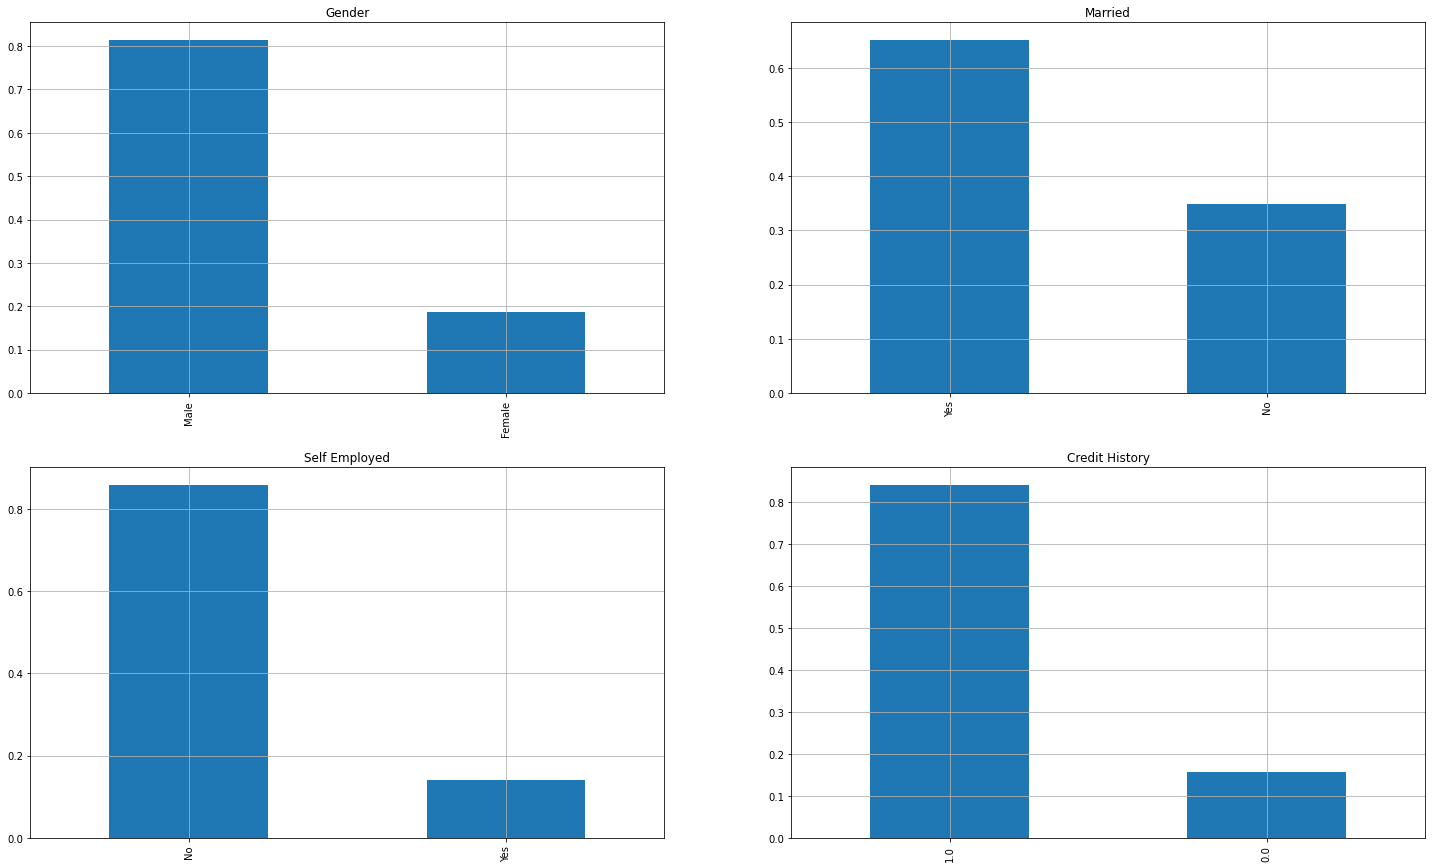

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(25,15),title='Gender')
plt.grid()
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.grid()
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.grid()
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.grid()




Independent Variable(Ordinal)

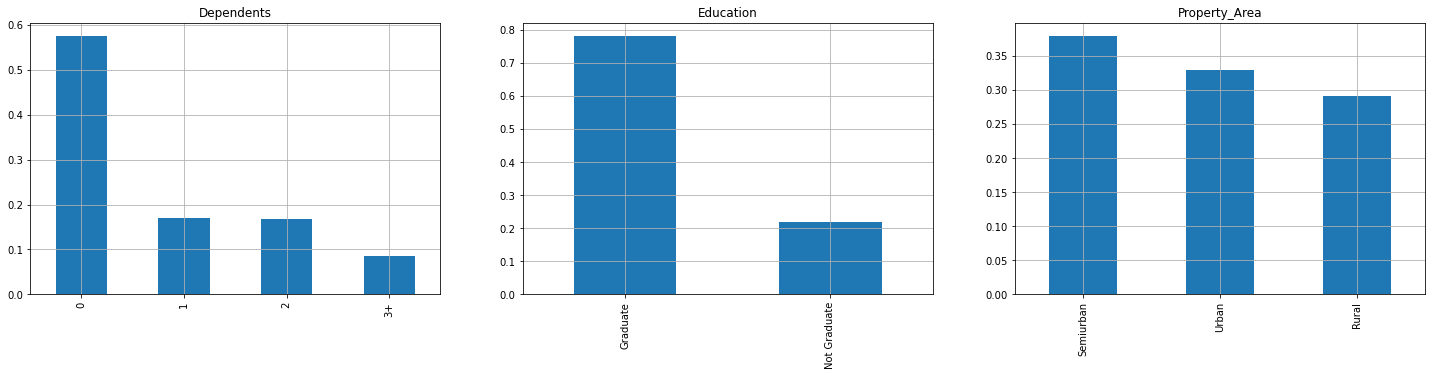

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(25,5),title='Dependents')
plt.grid()
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.grid()
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.grid()


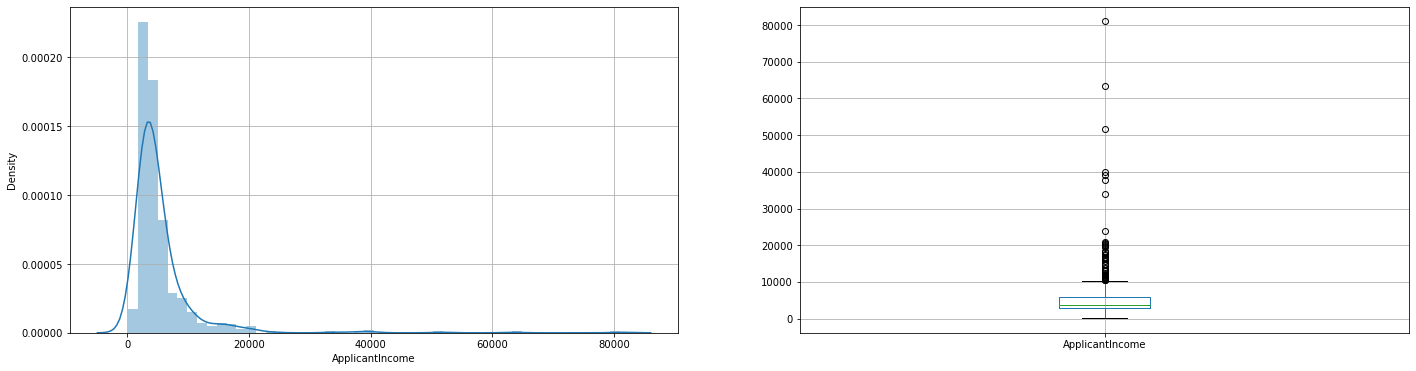

In [14]:
#now we will plot the continuous features and for that we will use the seaborn library 
#distplot() is the function which returns the histogram with aline drawn on it
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.grid()
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(24,6))
plt.grid()

Text(0.5, 0.98, ' ')

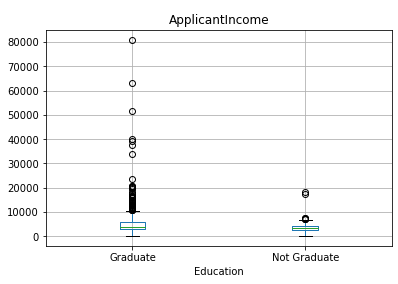

In [15]:
# the box plot confirms the presence of the outliers/extreme values
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")

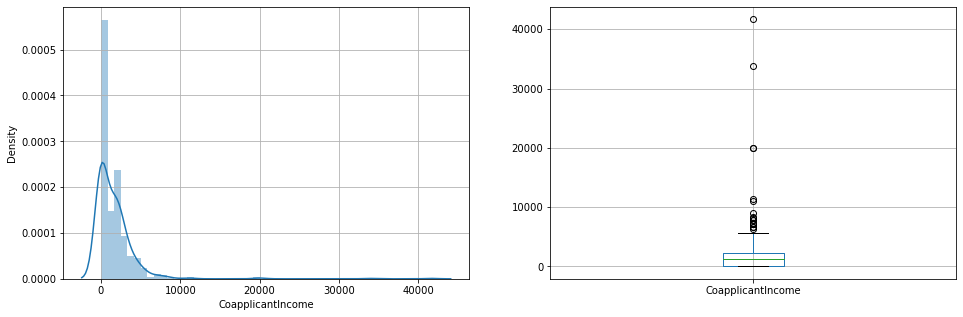

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.grid()
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.grid()

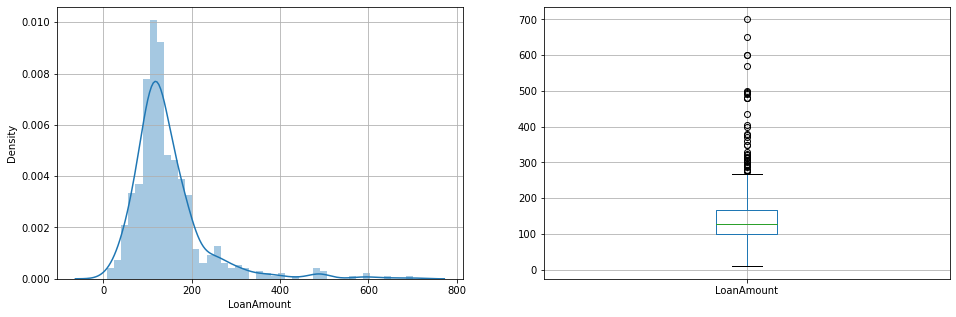

In [17]:
plt.figure(1)
plt.subplot(121)
df=train.dropna() # did not get this ...keep it in mind while revising these codes
sns.distplot(train['LoanAmount'])
plt.grid()
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.grid()

Bivariate Analysis

In [18]:
train['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [19]:
Gender=pd.crosstab(train['Gender'], train['Loan_Status']) # by adding the margins we get the total values also.

In [20]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [21]:
Gender_1=pd.crosstab(train['Gender'], train['Loan_Status'],margins= True,margins_name='All',normalize='index') #normalize over row values

In [22]:
Gender_1

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252
All,0.311148,0.688852


In [23]:
Gender_2=pd.crosstab(train['Gender'], train['Loan_Status'],margins= True,normalize='index') #normalize over row values

In [24]:
Gender_2

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252
All,0.311148,0.688852


In [25]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [26]:
Gender.sum(1).astype(float) # ye sum(1) or  sum(0) ka bahut bakchodi h .

Gender
Female    112.0
Male      489.0
dtype: float64

In [27]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

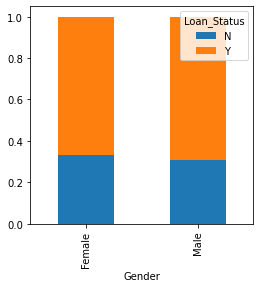

In [28]:
Gender.div(Gender.sum(1).astype(float),axis='index').plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Gender'>

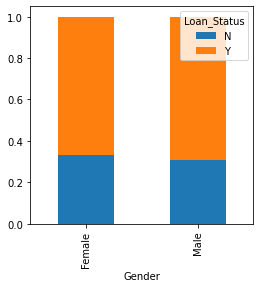

In [29]:
Gender.div(Gender.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

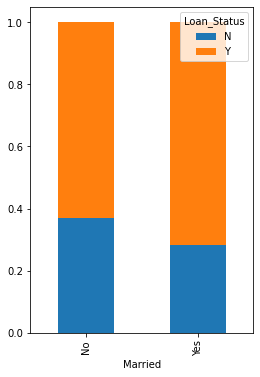

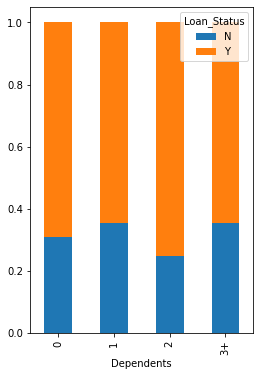

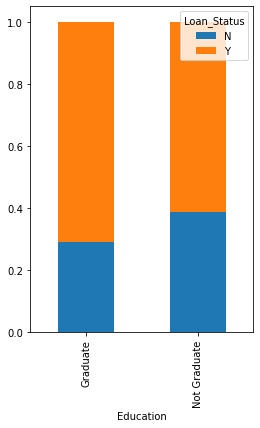

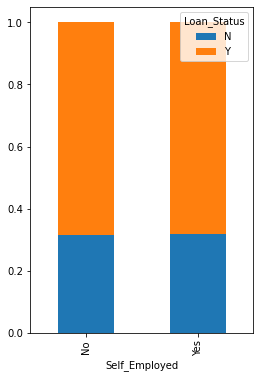

In [30]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))
Dependents.div(Dependents.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))
Education.div(Education.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))





<AxesSubplot:xlabel='Property_Area'>

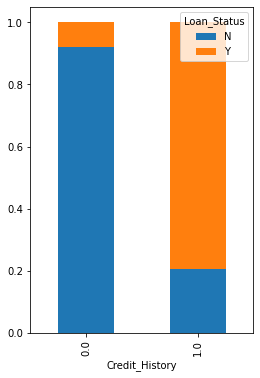

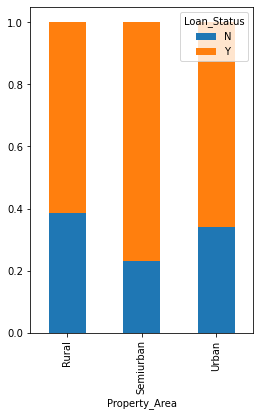

In [31]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))
Property_Area.div(Property_Area.sum(1).astype(float),axis='index').plot.bar(stacked=True,figsize=(4,6))

Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

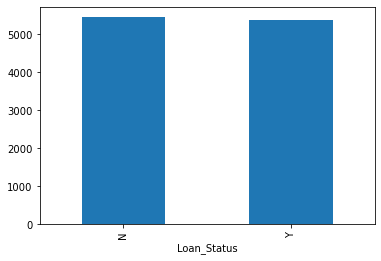

In [32]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar() # y-axis represents the mean application income

Text(0, 0.5, 'Percentage')

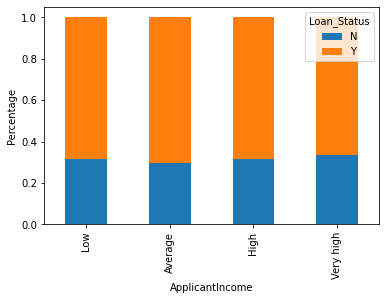

In [33]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)#check the documentation of pd.cut
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

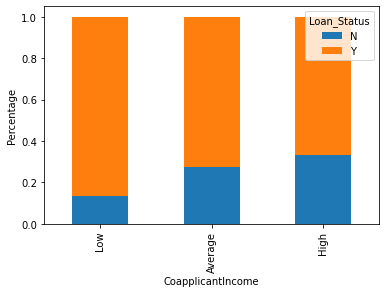

In [34]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)#check the documentation of pd.cut
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')



Text(0, 0.5, 'Percentage')

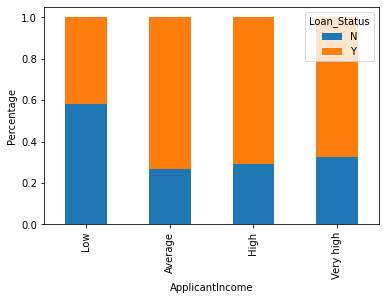

In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)#check the documentation of pd.cut
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='LoanAmount_bin'>

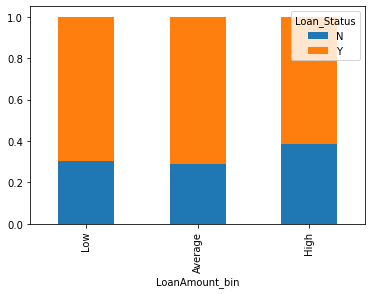

In [36]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

In [37]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [38]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)



<AxesSubplot:>

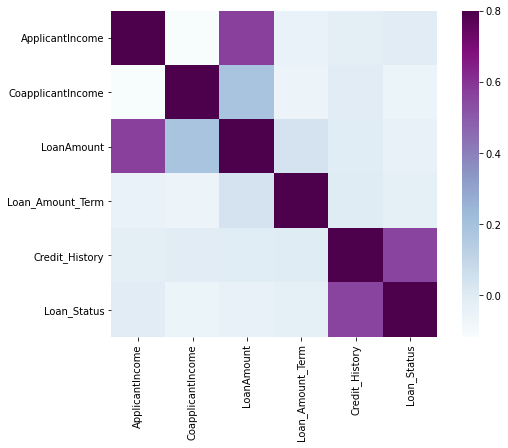

In [39]:
matrix=train.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

# Missing value imputation

In [40]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For Numerical variables: imputation using the mean or median

For categorical variables:imputation using the mode of the data

In [41]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True) # mode()[0] ka kuch to bakchodi hai
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [42]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [43]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [44]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [45]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
train.mode().value_counts()

Loan_ID   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001002  Male    Yes      0           Graduate   No             2500.0           0.0                128.0       360.0             1.0             Semiurban      1.0            1
dtype: int64


# Outlier Treatment

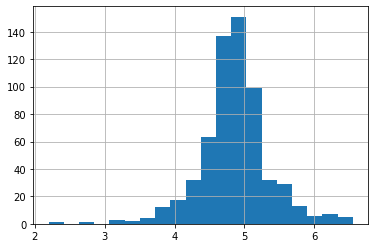

In [47]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

# Model Prediction Part-1

In [48]:
#dropping the Loan_ID variable because it does not have any effect on the loan status
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [49]:
#dropping the target variable and saving it in another data set
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [50]:
#.get_dummies converts categorical variables into a series of 0 and 1(converts categorical variables into dummy variables)
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [51]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3)
#point to be noted here that we are using only training data for trainig and validation because we cannot use the test data here because then splitting won't take place.


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
#prediction part
pred_val=model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8

In [55]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['LoanAmount'].mode()[0],inplace=True)
test['LoanAmount_log'].fillna(test['LoanAmount_log'].mean(),inplace=True)

In [56]:
pred_test=model.predict(test)


In [57]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of Kfold5
accuracy_score is : 0.8048780487804879

2 of Kfold5
accuracy_score is : 0.8373983739837398

3 of Kfold5
accuracy_score is : 0.7804878048780488

4 of Kfold5
accuracy_score is : 0.7886178861788617

5 of Kfold5
accuracy_score is : 0.7950819672131147


<function matplotlib.pyplot.show(close=None, block=None)>

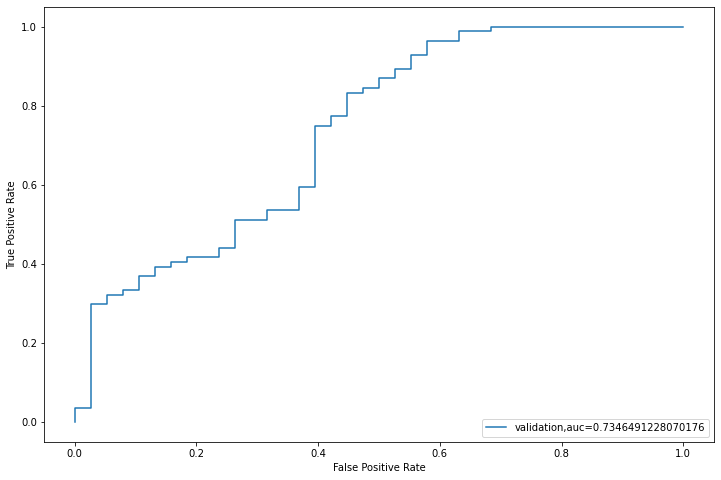

In [58]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show


# Faeture Engineering


In [59]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

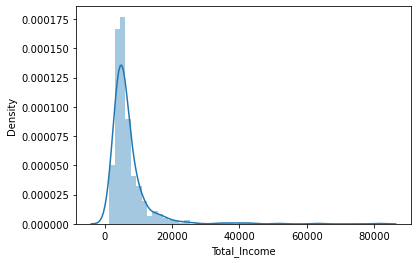

In [60]:
sns.distplot(train['Total_Income'])

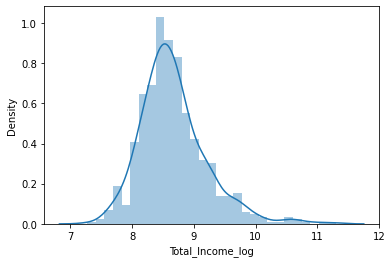

In [61]:
# we can see it is shifted towards left, so let's take the log transformation to make the distribution normal
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_Income'])
#here density formula is given by DENSITY=counts/sum(counts*Bar Width)

<AxesSubplot:xlabel='EMI', ylabel='Density'>

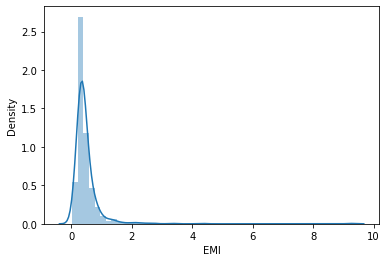

In [62]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=train['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])


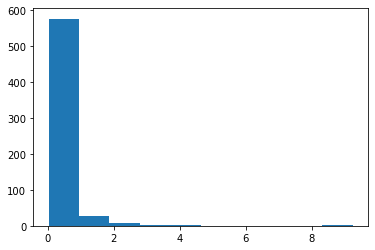

In [63]:
plt.figure()
plt.hist(train['EMI'],bins=10)
plt.show()

In [64]:
(train['LoanAmount']/train['Loan_Amount_Term']).value_counts()

0.355556    29
0.333333    19
0.305556    17
0.277778    13
0.444444    11
            ..
1.388889     1
0.855556     1
4.305556     1
0.172222     1
0.875000     1
Length: 237, dtype: int64

In [65]:
train['Total_Income'].value_counts()

6000.0     5
3750.0     4
4583.0     4
2500.0     4
6500.0     3
          ..
18165.0    1
8500.0     1
4945.0     1
6782.0     1
3000.0     1
Name: Total_Income, Length: 554, dtype: int64

In [66]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

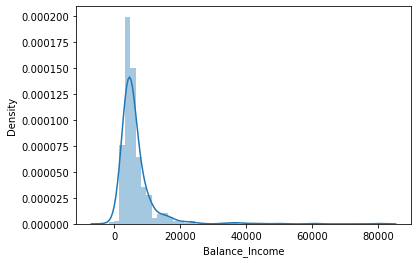

In [76]:
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
#Multiply with 1000 to make the units equal test
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

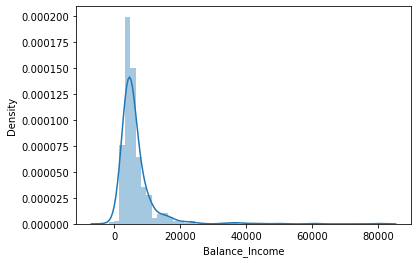

In [68]:
sns.distplot(train['Balance_Income'])

In [69]:
train['EMI'].value_counts()

0.355556    29
0.333333    19
0.305556    17
0.277778    13
0.444444    11
            ..
1.388889     1
0.855556     1
4.305556     1
0.172222     1
0.875000     1
Name: EMI, Length: 237, dtype: int64

In [70]:
#now let's drop the vaiables which we used to create these new features.
#reason for doing this is that the correlation between those old and new features will be very high
#and logistic regression assumes that the varibles are not highly correlated.
#we also wants to remove the noise from the dataset,so removing correlated features will reduce noise.
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Model Building Part-II

In [77]:
X= train.drop('Loan_Status',1)
y = train.Loan_Status   # saving target variable in separate data set.

In [79]:
# Decision Tree
from sklearn import tree
i=1
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=0)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of Kfold5
accuracy_score is : 0.7235772357723578

2 of Kfold5
accuracy_score is : 0.6829268292682927

3 of Kfold5
accuracy_score is : 0.7398373983739838

4 of Kfold5
accuracy_score is : 0.7073170731707317

5 of Kfold5
accuracy_score is : 0.7295081967213115


In [72]:
#Logistic Regression
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of Kfold5
accuracy_score is : 0.8048780487804879

2 of Kfold5
accuracy_score is : 0.8373983739837398

3 of Kfold5
accuracy_score is : 0.7804878048780488

4 of Kfold5
accuracy_score is : 0.7886178861788617

5 of Kfold5
accuracy_score is : 0.7950819672131147


In [81]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of Kfold10
accuracy_score is : 0.8064516129032258

2 of Kfold10
accuracy_score is : 0.8387096774193549

3 of Kfold10
accuracy_score is : 0.8225806451612904

4 of Kfold10
accuracy_score is : 0.7903225806451613

5 of Kfold10
accuracy_score is : 0.8360655737704918

6 of Kfold10
accuracy_score is : 0.7540983606557377

7 of Kfold10
accuracy_score is : 0.7868852459016393

8 of Kfold10
accuracy_score is : 0.8360655737704918

9 of Kfold10
accuracy_score is : 0.7540983606557377

10 of Kfold10
accuracy_score is : 0.7704918032786885


In [90]:
from sklearn.model_selection import GridSearchCV
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3, random_state=1)

grid_search.fit(x_train, y_train)

# GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini',max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,
#                          min_impurity_split = None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,
#                          n_estimators=10, n_jobs=1, oob_score=False, random_state=1,verbose=0, warm_state=False),
#                         param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19], 'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
#                          pre_disptach='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)
                                                                           
#grid_search.best_estimator_

#RandomForestClassifier(bootstrap=True, class_weight=None, 
                        

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [91]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [104]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of Kfold5
accuracy_score is : 0.8211382113821138

2 of Kfold5
accuracy_score is : 0.8373983739837398

3 of Kfold5
accuracy_score is : 0.7804878048780488

4 of Kfold5
accuracy_score is : 0.7804878048780488

5 of Kfold5
accuracy_score is : 0.7868852459016393


In [101]:
# Using XGBoostClassifier
from xgboost import XGBClassifier

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=XGBClassifier(max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score is :', score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    pred3=model.predict_proba(test)[:,1]


1 of Kfold5
[20:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score is : 0.8130081300813008

2 of Kfold5
[20:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score is : 0.7886178861788617

3 of Kfold5
[20:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score is : 0.7967479674796748

4 of Kfold5
[20:37:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the 